In [1]:
import random
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

np.random.seed(42)

- 参考：https://www.barbierjoseph.com/visualization/

## 生成数据

In [2]:
provinces = [
    "anhui", "beijing", "chongqing", "fujian", "gansu", "guangdong", "guangxi", "guizhou", "hainan", "hebei", 
    "heilongjiang", "henan", "hubei", "hunan", "jiangsu", "jiangxi", "jilin", "liaoning", "neimenggu", "ningxia", 
    "qinghai", "shaanxi", "shandong", "shanghai", "shanxi", "sichuan", "tianjin", "xinjiang", "xizang", "yunnan", 
    "zhejiang", "hongkong", "macao", "taiwan"
]
academic_years = ["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020"]
data = []
for province in provinces:
    avg_students = random.randint(500, 10000)  # 平均学生数
    
    for year in academic_years:
        students_out = max(0, int(random.gauss(avg_students, avg_students * 0.2)))  # 出境学生
        students_in = max(0, students_out + random.randint(-200, 200))  # 入境学生，波动100-200
        
        data.append([province, year, students_out, students_in])

df = pd.DataFrame(data, columns=["Province", "Year", "Outgoing_Students", "Incoming_Students"])
df

,Province,Year,Outgoing_Students,Incoming_Students
0,anhui,2014-2015,8431,8310
1,anhui,2015-2016,9311,9425
2,anhui,2016-2017,8655,8474
3,anhui,2017-2018,6752,6649
4,anhui,2018-2019,10395,10221
...,...,...,...,...
199,taiwan,2015-2016,3222,3232
200,taiwan,2016-2017,3491,3586
201,taiwan,2017-2018,3799,3955
202,taiwan,2018-2019,3186,3057


## 绘图

In [3]:
df0 = df.groupby(by=['Province'], as_index=False).agg({'Outgoing_Students':'mean','Incoming_Students':'mean'}).sort_values('Outgoing_Students').reset_index(drop=True)
df0['Y_Position'] = df0.index  # 散点图的 y 
df0

,Province,Outgoing_Students,Incoming_Students,Y_Position
0,macao,812.833333,853.500000,0
1,beijing,1245.333333,1189.833333,1
2,jiangxi,1601.833333,1590.500000,2
3,yunnan,1675.833333,1637.166667,3
4,gansu,1748.833333,1699.666667,4
5,hongkong,2218.166667,2162.833333,5
6,hebei,2305.666667,2328.166667,6
7,shanxi,2374.666667,2299.333333,7
8,hainan,2602.666667,2616.833333,8
9,shanghai,2616.166667,2672.500000,9


In [4]:
df = df.merge(df0[['Province','Y_Position']], on='Province', how='left')
df

,Province,Year,Outgoing_Students,Incoming_Students,Y_Position
0,anhui,2014-2015,8431,8310,30
1,anhui,2015-2016,9311,9425,30
2,anhui,2016-2017,8655,8474,30
3,anhui,2017-2018,6752,6649,30
4,anhui,2018-2019,10395,10221,30
...,...,...,...,...,...
199,taiwan,2015-2016,3222,3232,12
200,taiwan,2016-2017,3491,3586,12
201,taiwan,2017-2018,3799,3955,12
202,taiwan,2018-2019,3186,3057,12


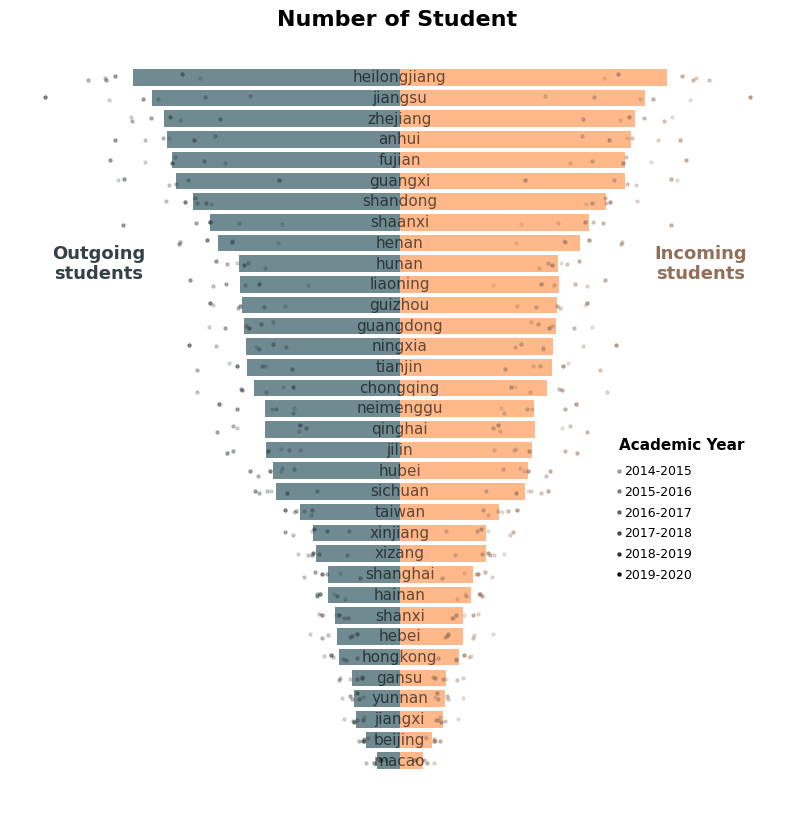

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制柱状图
ax.barh(df0['Province'], df0['Incoming_Students'],
        color='#FFB889', alpha=1)
ax.barh(df0['Province'], -df0['Outgoing_Students'],
        color='#6f8a91', alpha=1)

# 边框调整
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

# 添加每一年的散点
y_position = 0
for i, row in df.iterrows():
    output = -row['Outgoing_Students']
    input = row['Incoming_Students']
    y_position = row['Y_Position']
    years = row['Year']
    
    # 根据年份更改 alpha 参数
    year_alpha_mapping = {'2014-2015': 0.3,
                          '2015-2016': 0.4,
                          '2016-2017': 0.5,
                          '2017-2018': 0.6,
                          '2018-2019': 0.7,
                          '2019-2020': 0.9}
    alpha = year_alpha_mapping[years]*0.6
    y_position += np.random.normal(0, 0.1, 1)
    
    ax.scatter(output, y_position, c='#354144', alpha=alpha, s=5)
    ax.scatter(input, y_position, c='#926f59', alpha=alpha, s=5)

# x 
for i, country_name in enumerate(df0['Province']):
    ax.text(0, i, country_name, ha='center', va='center', fontsize=11, alpha=0.6)
ax.text(-11000, 24, 'Outgoing\nstudents',
        color='#354144', ha='center', va='center', weight='bold', fontsize=13)
ax.text(11000, 24, 'Incoming\nstudents',
        color='#926f59', ha='center', va='center', weight='bold', fontsize=13)


# 添加年图例
ax.text(x=8000, y=15, s='Academic Year', fontsize=11, weight='bold')
y_position = 14 # 从第 10 个 bar 开始
for year, alpha in year_alpha_mapping.items():
    ax.scatter(8000, y_position, alpha=alpha, s=5, c='black')
    ax.text(x=8200, y=y_position-0.2, s=year, fontsize=9)
    
    y_position -= 1  # 下一次迭代时减少一格


ax.set_title('Number of Student', weight='bold', fontsize=16)
plt.show()